In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nx_mom6 = 540
nx_pop = 320
xh_mom6 = np.linspace(0.0,2.0*np.pi,num=nx_mom6,endpoint=False)
xh_pop = np.linspace(0.0,2.0*np.pi,num=nx_pop,endpoint=False)
time = np.arange(0,24,1)

In [3]:
def solar_flux(x,t):
    omega = 2.0*np.pi/24.0
    phase = x.reshape((1,len(x))) + omega*t.reshape((len(t),1)) - np.pi/2.0
    sf = np.sin(phase)
    sf = np.where(sf < 0.0,0.0,sf)
    return sf

In [4]:
sf_mom6 = solar_flux(xh_mom6,time)
sf_pop = solar_flux(xh_pop,time)

In [5]:
sf_avg_mom6 = sf_mom6.mean(axis=0)
sf_avg_pop = sf_pop.mean(axis=0)

In [6]:
sf_avg_err_mom6 = np.abs(sf_avg_mom6 - 1/np.pi)
sf_avg_err_pop = np.abs(sf_avg_pop - 1/np.pi)

Text(0.5, 1.0, 'Solar Flux')

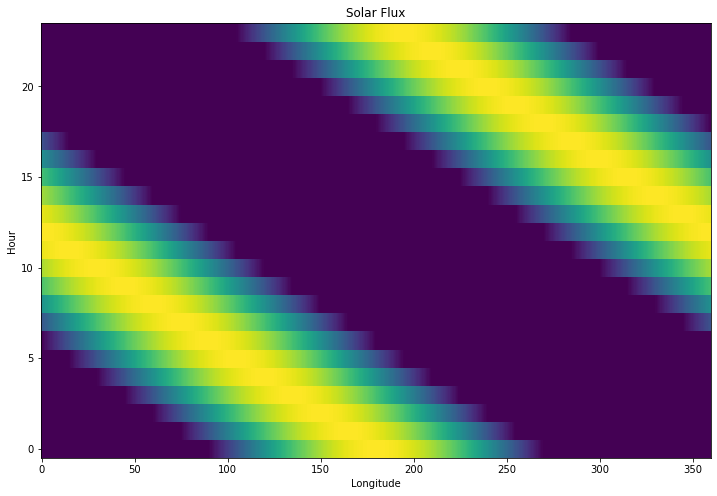

In [10]:
fig,ax=plt.subplots(figsize=(12,8))
ax.pcolormesh(xh_mom6*180.0/np.pi,time,sf_mom6,shading='auto')
ax.set_xlabel('Longitude')
ax.set_ylabel('Hour')
ax.set_title('Solar Flux')

Text(0.5, 1.0, 'Solar Flux at Greenwich')

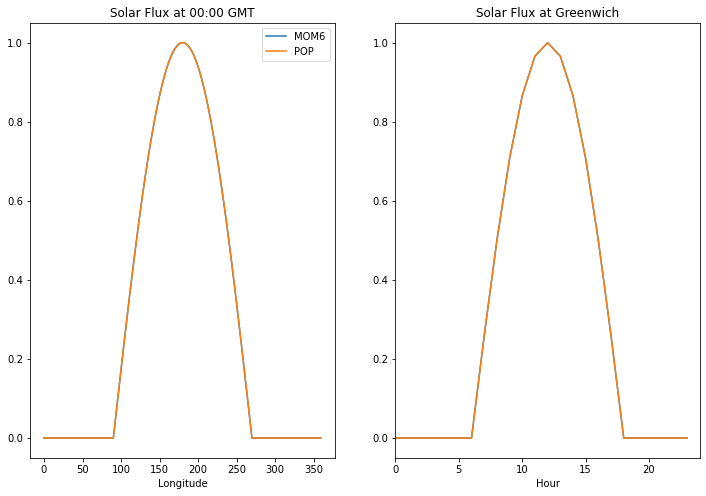

In [8]:
fig,ax = plt.subplots(ncols=2,figsize=(12,8))
n = 0
ax[0].plot(xh_mom6*180/np.pi,sf_mom6[n,:],label='MOM6')
ax[0].plot(xh_pop*180/np.pi,sf_pop[n,:],label='POP')
ax[0].legend()
ax[0].set_xlabel('Longitude')
ax[0].set_title('Solar Flux at 00:00 GMT')

i=0
ax[1].plot(time,sf_mom6[:,i],label='MOM6')
ax[1].plot(time,sf_pop[:,i],label='POP')
ax[1].set_xlim(0,24)
ax[1].set_xlabel('Hour')
ax[1].set_title('Solar Flux at Greenwich')

Text(0.5, 1.0, 'Relative Error')

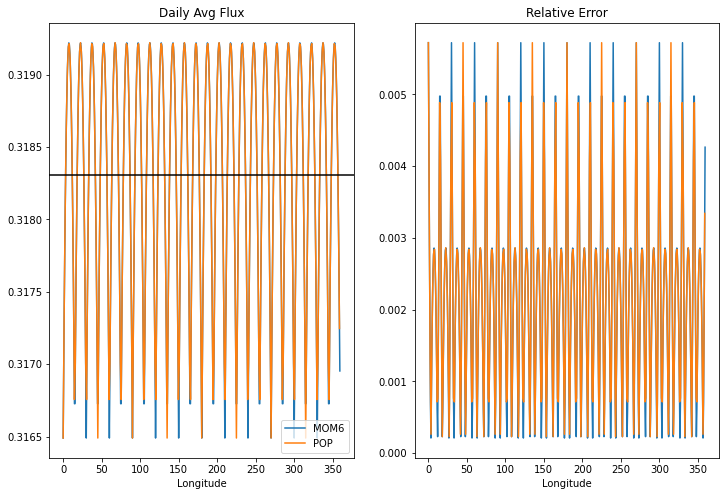

In [9]:
fig,ax = plt.subplots(ncols=2,figsize=(12,8))

ax[0].plot(xh_mom6*180/np.pi,sf_avg_mom6,label='MOM6')
ax[0].plot(xh_pop*180/np.pi,sf_avg_pop,label='POP')
ax[0].axhline(1.0/np.pi,color='black')
ax[0].set_xlabel('Longitude')
ax[0].legend()
ax[0].set_title('Daily Avg Flux')

ax[1].plot(xh_mom6*180/np.pi,sf_avg_err_mom6*np.pi,label='MOM6')
ax[1].plot(xh_pop*180/np.pi,sf_avg_err_pop*np.pi,label='POP')
ax[1].set_xlabel('Longitude')
ax[1].set_title('Relative Error')